<div style="color: #1a3988;">

# Predicción de Cancer de prostata

</div>



<div style="color: #398dd1;">

### Content

</div>




A cancer in a man's prostate, a small walnut-sized gland that produces seminal fluid. A man's prostate produces the seminal fluid that nourishes and transports sperm. Symptoms include difficulty with urination, but sometimes there are no symptoms at all.


<center>

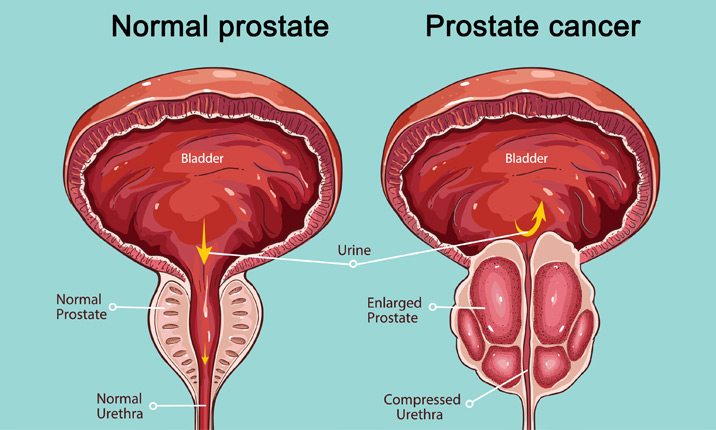

</center>

<div style="color: #398dd1;">

### Background

</div>

The data set consists of 100 observations and 10 variables (out of which 8 numeric variables and one categorical variable and is ID) which are as follows:

<table style="width:100%;">
  <tr>
    <td colspan="10" style="text-align:center;"><strong>Variables</strong></td>
  </tr>
  <tr>
    <td>Id</td>
    <td>Radius</td>
    <td>Texture</td>
    <td>Perimeter</td>
    <td>Area</td>
    <td>Smoothness</td>
    <td>Compactness</td>
    <td>diagnosis_result</td>
    <td>Symmetry</td>
    <td>Fractal dimension</td>
  </tr>
</table>




_The Id column can be eliminated (adds no value to the data)_

<div style="color: #398dd1;">

### Targets

</div>

The main target of this dataset is to detect if a patient will have prostate cancer or not

Target column is **diagnosis_result** where:

<br>

<table border="1" style="width: 80%; margin: 0 auto; text-align: center;">
  <tr>
    <th style="width: 20%; text-align: center;">Tumor Type</th>
    <th style="width: 80%; text-align: center;">Description</th>
  </tr>
  <tr>
    <td style="text-align: center;">M</td>
    <td style="text-align: center;">Cancerous: Malignant means that the tumor is made of cancer cells, and it can invade nearby tissues. Some cancer cells can move into the bloodstream or lymph nodes, where they can spread to other tissues within the body - this is called metastasis.</td>
  </tr>
  <tr>
    <td style="text-align: center;">B</td>
    <td style="text-align: center;">Noncancerous: If the cells are not cancerous, the tumor is benign. It won't invade nearby tissues or spread to other areas of the body (metastasize). A benign tumor is less worrisome unless it is pressing on nearby tissues, nerves, or blood vessels and causing damage. Fibroids in the uterus or lipomas are examples of benign tumors. Benign tumors may need to be removed by surgery.</td>
  </tr>
</table>




<div style="color: #1857ae;">

## Preparar entorno de trabajo

</div>



<div style="color: #398dd1;">

### Instalamos las librerías necesarias

</div>



Para instalar las librerías podemos hacerlo mediante `pip install` o `conda install`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

<div style="color: #1a3988;">

## Paso 1: Adquisición de los datos

</div>

In [2]:
import pandas as pd
prostate_df = pd.read_csv("../Datos/Prostate_Cancer.csv")
prostate_df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
# Observación de variables target
prostate_df.diagnosis_result.head()

0    M
1    B
2    M
3    M
4    M
Name: diagnosis_result, dtype: object

<div style="color: #1857ae;">

## Lectura de los datos

</div>

Crearemos un dataframe y lo rellenaremos con cada una de las `features` del dataset, eliminando también la feature `id`

In [4]:
# Cargamos los datos en un dataframe
df_features = prostate_df.loc[:, prostate_df.columns != 'diagnosis_result']
df_features = df_features.loc[:, df_features.columns != 'id']

In [5]:
df_features.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


<div style="color: #1857ae;">

## Lectura de la variable `target`

</div>

In [6]:
# B - Benign
# M - Malignant

LABELS = ["Malignant","Benign"]

df_target = prostate_df.diagnosis_result

In [7]:
df_target.value_counts()

diagnosis_result
M    62
B    38
Name: count, dtype: int64

Según la descripción del conjunto de datos, la distribución de la variable objetivo es:

62 - `Maligno`     38 - `Benigno`

Para empezar a trabajar concateno ambos dataframes: características (Features) y variable objetivo (target)

In [8]:
df = pd.concat([df_features, df_target], axis=1)
df.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result
0,23,12,151,954,0.143,0.278,0.242,0.079,M
1,9,13,133,1326,0.143,0.079,0.181,0.057,B
2,21,27,130,1203,0.125,0.160,0.207,0.060,M
3,14,16,78,386,0.070,0.284,0.260,0.097,M
4,9,19,135,1297,0.141,0.133,0.181,0.059,M


Ya tiene `df` la variable target al final

<div style="color: #1a3988;">

## Paso 2: Preprocesamiento de los datos

</div>


Comprobamos si los datos necesitan ser pre-procesados.

Ahora necesitaríamos estandarizar nuestros datos antes de comenzar a trabajar

In [9]:
df.isna().sum()

radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
diagnosis_result     0
dtype: int64

Los datos estan limpiados y pre-procesados

Ahora particionaremos el dataset en training y test

In [10]:
from sklearn.model_selection import train_test_split
X = df_features
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2021, stratify=y)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 8)
(30, 8)
(70,)
(30,)


<div style="color: #1857ae;">

## Conjunto de entrenamiento

</div>

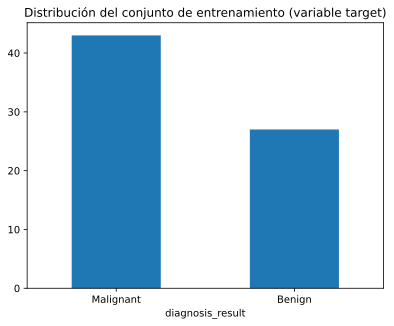

In [12]:
y_train.value_counts().plot(kind='bar', title='Distribución del conjunto de entrenamiento (variable target)', rot=0)
plt.xticks(range(2), LABELS);

<div style="color: #1857ae;">

### Conjunto de test

</div>

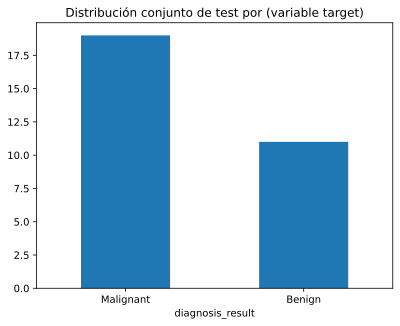

In [13]:
y_test.value_counts().plot(kind='bar', title='Distribución conjunto de test por (variable target)', rot=0);
plt.xticks(range(2), LABELS);

<div style="color: #398dd1;">

### Normalización de los datos

</div>

Muchos algoritmos de aprendizaje automático funcionan mejor o convergen más rápido cuando las características están en una escala relativamente similar y cerca de la distribución normal.

Por tanto, escalamos para controlar el hecho de que diferentes variables se midan en diferentes escalas (escalamos para que cada predictor pueda tener equilibrio para decidir la importancia).

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

- Escalador Estandar

In [15]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

Podemos ver como han cambiado los datos con respecto al principo:

In [16]:
# Antes
df_features.head(1)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079


In [17]:
# Despues
pd.DataFrame(data=X_train_scaled[0:,0:], columns=df_features.columns).head(1)

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,-1.19614,-0.632962,-0.028743,0.001054,-0.573481,-1.220357,-1.111087,-1.272149


<div style="color: #1a3988;">

## Paso 3: Selección del modelo

</div>




<div style="color: #1857ae;">

### Random Forest Classification

</div>


In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
%timeit rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

75.3 ms ± 5.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


1.0

In [19]:
# Predección en el conjunto de test
y_pred = rfc.predict(X_test_scaled)

Evaluación del modelo

In [20]:
# Definimos función para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(3, 3))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues", cbar=False);
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

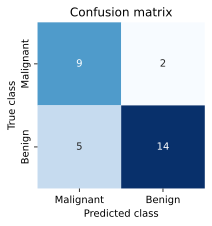



Classification Report: 
 
               precision    recall  f1-score   support

           B       0.64      0.82      0.72        11
           M       0.88      0.74      0.80        19

    accuracy                           0.77        30
   macro avg       0.76      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30



In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
mostrar_resultados(y_test, y_pred)
print("\n")
print("Classification Report: \n \n", classification_report(y_test, y_pred))

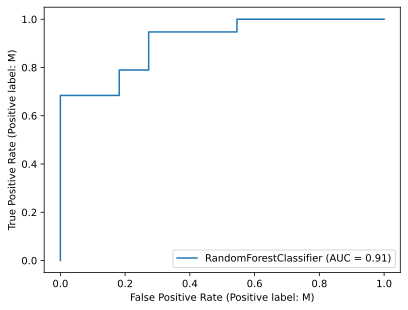

In [22]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, RocCurveDisplay

plot1 = RocCurveDisplay.from_estimator(rfc, X_test_scaled, y_test)

<div style="color: #398dd1;">

### K Neighbors

</div>

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

In [24]:
# Predección en el conjunto de test
y_pred = neigh.predict(X_test_scaled)

Evaluación del modelo

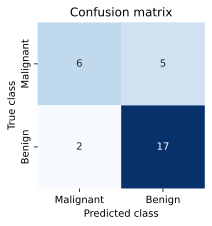



Classification Report: 
 
               precision    recall  f1-score   support

           B       0.75      0.55      0.63        11
           M       0.77      0.89      0.83        19

    accuracy                           0.77        30
   macro avg       0.76      0.72      0.73        30
weighted avg       0.76      0.77      0.76        30



In [25]:
mostrar_resultados(y_test, y_pred)
print("\n")
print("Classification Report: \n \n", classification_report(y_test, y_pred))

<div style="color: #398dd1;">

### Decision Trees

</div>

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

In [27]:
# Predección en el conjunto de test
y_pred = clf.predict(X_test_scaled)

Evaluación del modelo

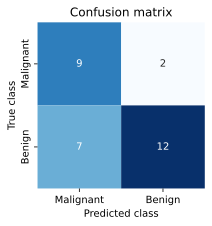



Classification Report: 
 
               precision    recall  f1-score   support

           B       0.56      0.82      0.67        11
           M       0.86      0.63      0.73        19

    accuracy                           0.70        30
   macro avg       0.71      0.72      0.70        30
weighted avg       0.75      0.70      0.71        30



In [28]:
mostrar_resultados(y_test, y_pred)
print("\n")
print("Classification Report: \n \n", classification_report(y_test, y_pred))

<div style="color: #398dd1;">

### Neural Network

</div>

In [29]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf = clf.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

In [30]:
# Predección en el conjunto de test
y_pred = clf.predict(X_test_scaled)

Evaluación del modelo

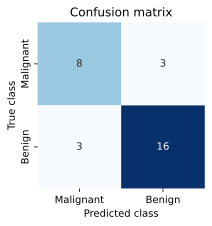



Classification Report: 
 
               precision    recall  f1-score   support

           B       0.73      0.73      0.73        11
           M       0.84      0.84      0.84        19

    accuracy                           0.80        30
   macro avg       0.78      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



In [31]:
mostrar_resultados(y_test, y_pred)
print("\n")
print("Classification Report: \n \n", classification_report(y_test, y_pred))

<div style="color: #1a3988;">

## Paso 4: Hiperparametrización

</div>


Los hiperparámetros se pueden considerar como "configuraciones" para un modelo. La configuración perfecta para un conjunto de datos no será la misma para otro, por lo que tenemos que "ajustar" el modelo.

Empiezo cambiando los siguientes parámetros:


<table border="1">
  <tr>
    <th style="text-align: center;">Parámetro</th>
    <th style="text-align: center;">Descripción</th>
  </tr>
  <tr>
    <td style="text-align: center;">n_estimators</td>
    <td style="text-align: center;">El número de "árboles"</td>
  </tr>
  <tr>
    <td style="text-align: center;">max_features</td>
    <td style="text-align: center;">El número de características en cada división</td>
  </tr>
  <tr>
    <td style="text-align: center;">max_depth</td>
    <td style="text-align: center;">Profundidad de cada árbol de decisión</td>
  </tr>
  <tr>
    <td style="text-align: center;">min_samples_split</td>
    <td style="text-align: center;">El número mínimo de observaciones requeridas antes de que un nodo de un árbol pueda dividirse</td>
  </tr>
  <tr>
    <td style="text-align: center;">min_samples_leaf</td>
    <td style="text-align: center;">El número mínimo de observaciones requeridas en cada hoja en los extremos de cada árbol</td>
  </tr>
  <tr>
    <td style="text-align: center;">bootstrap</td>
    <td style="text-align: center;">Bootstrap o no para los datos en Random Forest (Bootstrapping es un muestreo aleatorio del conjunto de datos con reemplazo).</td>
  </tr>
</table>

<div style="color: #398dd1;">

### Random Search

</div>

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos el modelo
rfc = RandomForestClassifier()

# [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
# [2, 7, 12, 18, 23, 28, 34, 39, 44, 50]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]

bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Se ejecutará 100 veces (por n_iter)
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)


rs.fit(X_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 300,
 'min_samples_split': 28,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_depth': 13,
 'bootstrap': True}

Creamos 300 modelos Random Forest, muestreando aleatoriamente combinaciones de los hiperparámetros que hemos configurado. Podemos llamar a best_params_ para obtener los parámetros del modelo de mejor rendimiento

In [33]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)

rs_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.463758,0.063959,0.115010,0.007371,1000,12,7,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 12...",0.875000,0.956522,0.869565,0.900362,0.039773,1
1,0.525078,0.006633,0.023179,0.006386,200,12,2,log2,4,True,"{'n_estimators': 200, 'min_samples_split': 12,...",0.875000,0.956522,0.869565,0.900362,0.039773,1
2,0.899561,0.048772,0.042850,0.003863,300,28,7,log2,13,True,"{'n_estimators': 300, 'min_samples_split': 28,...",0.875000,0.956522,0.869565,0.900362,0.039773,1
3,2.430214,0.057272,0.131808,0.008188,1000,7,12,sqrt,2,True,"{'n_estimators': 1000, 'min_samples_split': 7,...",0.833333,0.956522,0.869565,0.886473,0.051693,4
4,1.873377,0.097862,0.104996,0.026403,700,2,2,log2,11,True,"{'n_estimators': 700, 'min_samples_split': 2, ...",0.875000,0.913043,0.869565,0.885870,0.019343,5


Podemos eliminar los tiempos de ejecución y los resultados de los CV por separados, ya que lo importante es la combinación de parámetros y la media de los resultados de CV.

In [34]:
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(5)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,1000,12,7,sqrt,10,True,0.900362,1
1,200,12,2,log2,4,True,0.900362,1
2,300,28,7,log2,13,True,0.900362,1
3,1000,7,12,sqrt,2,True,0.886473,4
4,700,2,2,log2,11,True,0.885870,5


<div style="color: #398dd1;">

### Grid Search

</div>

Después de usar `RandomSearchCV`, podemos usar `GridSearchCV` para realizar una búsqueda más refinada de nuestros mejores hiperparámetros. Los hiperparámetros son los mismos, pero ahora realizamos una búsqueda más "exhaustiva" usando `GridSearchCV`.

En `GridSearchCV`, se prueba cada combinación de valores de hiperparámetros, lo que requiere mucho más poder computacional que `RandomSearchCV`, donde podemos controlar directamente cuántas iteraciones queremos probar. Por ejemplo, buscar solo 10 valores de parámetros diferentes para cada uno de nuestros 6 parámetros, con una validación cruzada triple, requerirá 10⁶ x 3 = 3.000.000 de ajustes de modelo.

Es por eso que realizamos `GridSearchCV` después de usar RandomSearchCV, para limitar nuestra búsqueda

In [35]:
from sklearn.model_selection import GridSearchCV

n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled, y_train)
rfc_3 = gs.best_estimator_

gs.best_params_

rs.best_params_

y_pred_gs = gs.best_estimator_.predict(X_test_scaled)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


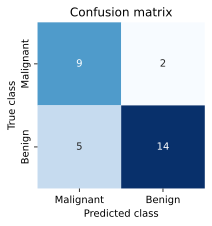



Classification Report: 
 
               precision    recall  f1-score   support

           B       0.64      0.82      0.72        11
           M       0.88      0.74      0.80        19

    accuracy                           0.77        30
   macro avg       0.76      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30



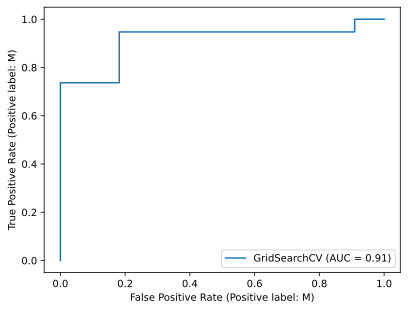

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, RocCurveDisplay

from sklearn.metrics import classification_report
mostrar_resultados(y_test, y_pred_gs)
print("\n")
print("Classification Report: \n \n", classification_report(y_test, y_pred_gs))

RocCurveDisplay.from_estimator(gs, X_test_scaled, y_test)